<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/OpenCV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

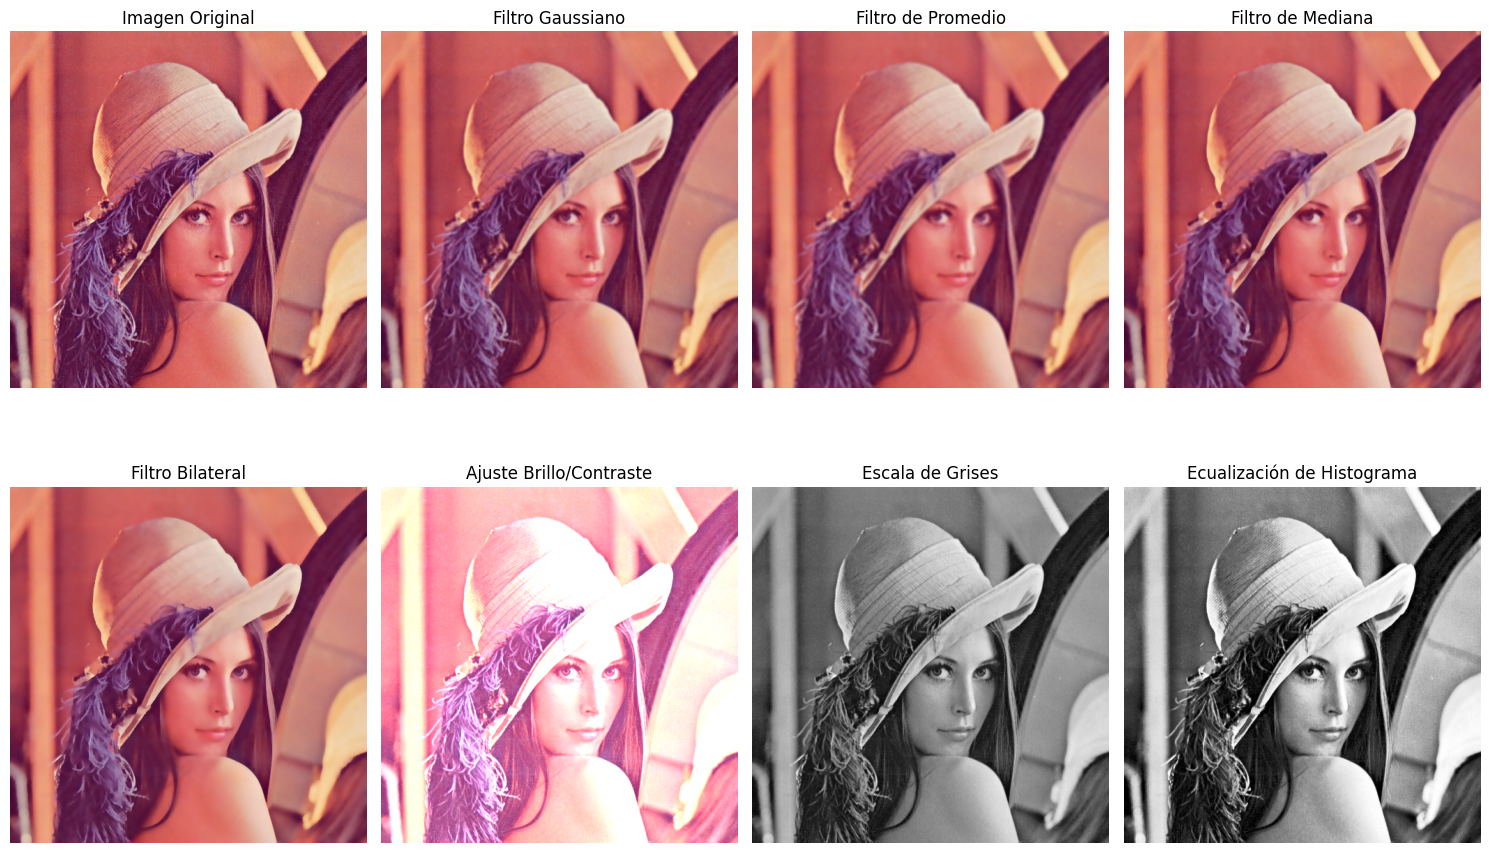

/tmp/ipython-input-3408595791.py:89: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256, [0, 256])
/tmp/ipython-input-3408595791.py:95: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


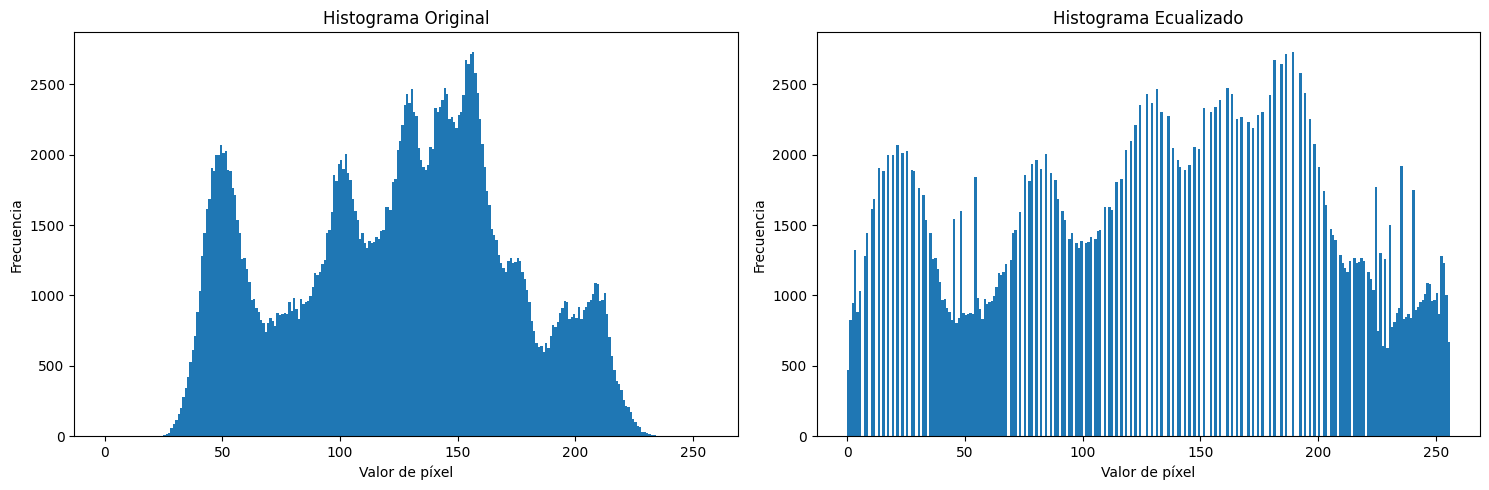

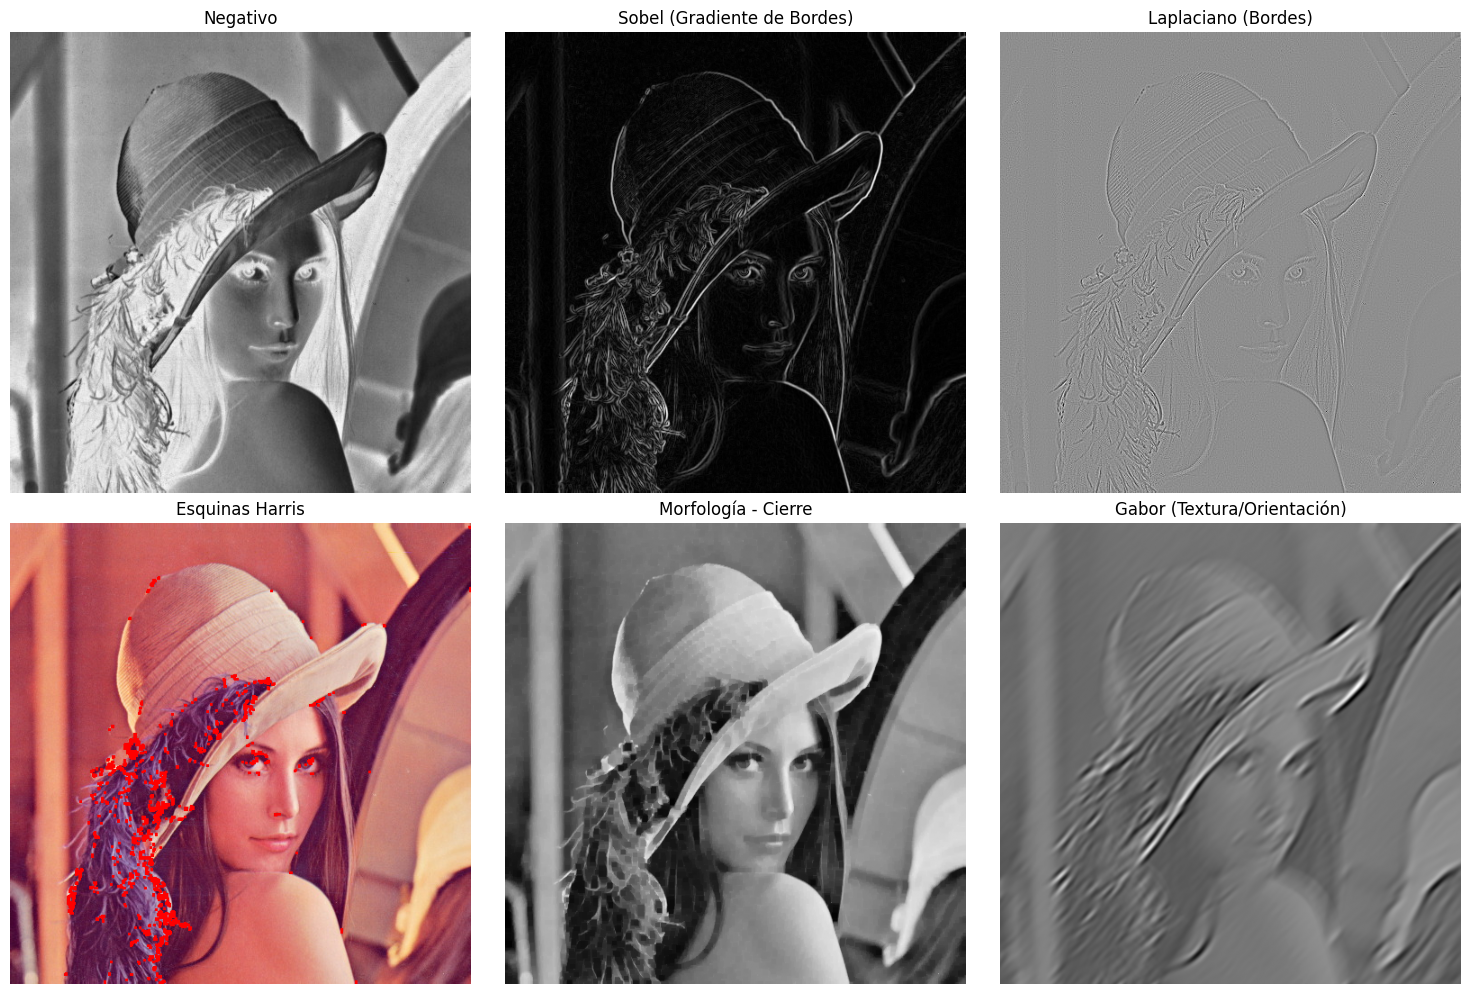

In [4]:
# Notebook 3: Filtros y efectos básicos en imágenes

# Importamos las librerías necesarias
import cv2  # Procesamiento de imágenes
import numpy as np  # Manejo de arrays
import matplotlib.pyplot as plt  # Visualización
from google.colab.patches import cv2_imshow  # Mostrar imágenes en Colab

# Cargar una imagen de ejemplo
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
resp = urlopen(url)
img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Suavizado Gaussiano
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# 2. Filtro de Promedio
average_blurred = cv2.blur(image_rgb, (5, 5))

# 3. Filtro de Mediana
median_blurred = cv2.medianBlur(image_rgb, 5)

# 4. Filtro Bilateral
bilateral_blurred = cv2.bilateralFilter(image_rgb, 9, 75, 75)

# 5. Brillo y Contraste
alpha = 1.5
beta = 50
image_brightness_contrast = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

# 6. Ecualización de Histograma
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray_image)

# Visualización de los filtros básicos
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.title('Imagen Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Filtro Gaussiano')
plt.imshow(blurred_image)
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Filtro de Promedio')
plt.imshow(average_blurred)
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Filtro de Mediana')
plt.imshow(median_blurred)
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Filtro Bilateral')
plt.imshow(bilateral_blurred)
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Ajuste Brillo/Contraste')
plt.imshow(image_brightness_contrast)
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Escala de Grises')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Ecualización de Histograma')
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Histogramas
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Histograma Original')
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.title('Histograma Ecualizado')
plt.hist(equalized.ravel(), 256, [0, 256])
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# ================================
# 7–11. Filtros avanzados para visión artificial
# ================================

# 7) Filtro Negativo
# Invierte los valores de los píxeles (255 - valor), útil para resaltar contornos y contrastes.
negative = cv2.bitwise_not(gray_image)

# 8) Detección de bordes Sobel
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 9) Filtro Laplaciano
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# 10) Detección de esquinas (Harris)
gray_float = np.float32(gray_image)
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)
corner_image = image_rgb.copy()
corner_image[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]

# 11) Filtro Morfológico (Cierre)
kernel = np.ones((5, 5), np.uint8)
morph_close = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

# 12) Filtro de Gabor (textura y orientación)
kernel_gabor = cv2.getGaborKernel((21, 21), 4.0, np.deg2rad(45), 10.0, 0.5, 0, ktype=cv2.CV_32F)
gabor = cv2.filter2D(gray_image, cv2.CV_32F, kernel_gabor)
gabor_norm = cv2.normalize(gabor, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Visualización completa (2x3)
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Negativo')
plt.imshow(negative, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Sobel (Gradiente de Bordes)')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Laplaciano (Bordes)')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Esquinas Harris')
plt.imshow(corner_image)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Morfología - Cierre')
plt.imshow(morph_close, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Gabor (Textura/Orientación)')
plt.imshow(gabor_norm, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

**Filtros avanzados para mejorar el reconocimiento**

*1) Filtro Negativo*

Por qué lo uso: invertir los niveles de intensidad (255 − valor) puede resaltar bordes y transiciones que pasan desapercibidas en la imagen original.
Qué mejora: el contraste de contornos en zonas donde el fondo y el objeto tienen distribuciones de intensidad similares.
Qué permite: facilita la detección de formas y bordes cuando el modelo o el algoritmo es sensible a la polaridad del contraste (p. ej., antes de un detector de bordes).

*2) Detección de Bordes con Sobel*

Por qué lo uso: Sobel calcula gradientes en X e Y, que capturan direcciones y magnitudes del cambio de intensidad.
Qué mejora: la definición de contornos y la información de orientación local.
Qué permite: apoyar tareas de segmentación, detección de límites y extracción de características direccionales (útil para reconocimiento de formas y preprocesamiento de contornos).

*3) Filtro Laplaciano*

Por qué lo uso: el operador Laplaciano responde a cambios bruscos de intensidad y resalta zonas de alta curvatura (segundas derivadas).
Qué mejora: la visibilidad de detalles finos, texturas y bordes delgados.
Qué permite: mejorar la localización de contornos y la realce de detalles antes de técnicas de segmentación o de emparejamiento de patrones.

*4) Detección de Esquinas (Harris)*

Por qué lo uso: las esquinas son puntos con variación significativa en múltiples direcciones, muy informativos para seguimiento y emparejamiento.
Qué mejora: la detección de puntos de interés robustos (keypoints) y repetibles.
Qué permite: mejorar el tracking, la reconstrucción de escenas y el emparejamiento entre imágenes (por ejemplo, en registro, mosaico o SLAM), además de alimentar descriptores como ORB/SIFT.

*5) Morfología (Cierre)*

Por qué lo uso: el cierre (dilatación seguida de erosión) une bordes cercanos y rellena pequeños huecos sin degradar demasiado la forma.
Qué mejora: la limpieza de regiones segmentadas y la continuidad de contornos.
Qué permite: obtener máscaras más sólidas para conteo de objetos, medición de áreas o como paso previo a encontrar componentes conectados y contornos estables.

*6) Filtro de Gabor (Textura y Orientación)*

Por qué lo uso: Gabor actúa como un detector de frecuencia y orientación; es sensible a patrones periódicos y texturas.
Qué mejora: la discriminación de texturas y la respuesta a direcciones concretas de trazo o tejido.
Qué permite: clasificación y segmentación basadas en textura, extracción de rasgos orientados y robustez en escenarios donde la textura es clave (tejidos, huellas, madera, cabello, patrones repetitivos).